In [1]:
from preprocess import *
import pandas as pd
from connection import *

In [2]:
con = getConnection()
# sorry for this, we need to set schema this way
df = pd.read_sql_query("""
	set search_path to mimiciii;
	SELECT COUNT(*) FROM patients;
	""", con=con)

In [3]:
stays = getICUStayPatients()

In [4]:
stays.head()

,hadm_id,icustay_id,gender,dob,intime,outtime,dod,los,age
0,110404,280836,0,2132-02-21 00:00:00,2198-02-14 23:27:38,2198-02-18 05:26:11,2198-02-18 00:00:00,3.2490,65
1,129886,219649,1,2088-08-07 00:00:00,2170-10-07 11:28:53,2170-10-14 14:38:07,2170-10-19 00:00:00,7.1314,82
2,192224,204407,1,2090-02-27 00:00:00,2164-06-14 21:18:27,2164-06-18 22:53:12,2164-06-27 00:00:00,4.0658,74
3,109185,231490,1,2090-09-05 00:00:00,2166-08-12 22:03:26,2166-09-12 14:41:42,2166-12-09 00:00:00,30.6932,75
4,165312,238023,1,2107-05-16 00:00:00,2152-09-21 22:48:50,2152-10-20 15:19:31,NaN,28.6880,45


In [5]:
ts = getICUStayTimeSeries(stays.iloc[38])
ts.head()

,Time,icustay_id,age,gender,Respiratory Rate,SpO2,Temperature,Heart Rate,CVP,Hematocrit,...,Creatinine,Chloride,Urea Nitrogen,Platelet Count,White Blood Cells,Red Blood Cells,Calculated Total CO2,pH,NeedInvasive Ventilation,NeedNon-invasive Ventilation
0,2179-02-16 11:00:00,268261,50,0,17.75,98.0,None,92.25,20.0,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,28.0,7.440,0,0
1,2179-02-16 12:00:00,268261,50,0,17.75,98.0,None,92.25,20.0,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,26.0,7.430,0,0
2,2179-02-16 13:00:00,268261,50,0,17.75,98.0,None,92.25,20.0,24.6,...,0.7,112.0,14.0,73.0,15.6,2.61,25.0,7.380,0,0
3,2179-02-16 14:00:00,268261,50,0,17.75,98.0,None,92.25,20.0,24.6,...,0.7,112.0,14.0,86.0,15.6,2.61,26.0,7.410,0,0
4,2179-02-16 15:00:00,268261,50,0,17.75,98.0,None,92.25,20.0,31.0,...,0.7,112.0,14.0,86.0,11.9,3.48,27.5,7.375,0,0


In [6]:
ventilations = pd.read_sql('SELECT DISTINCT icustay_id FROM procedureevents_mv WHERE icustay_id IS NOT NULL AND (itemid=225792 OR itemid=225794)',con=con)

In [7]:
stays_with_ventilation = stays[stays['icustay_id'].isin(ventilations['icustay_id'])]

In [8]:
len(stays_with_ventilation), len(stays)

(1690, 9785)

In [9]:
stays_with_ventilation

,hadm_id,icustay_id,gender,dob,intime,outtime,dod,los,age
37,138376,256064,1,2090-11-19 00:00:00,2166-01-09 13:05:18,2166-02-01 10:52:09,2166-02-01 00:00:00,22.9075,75
169,135614,224934,1,2055-03-04 00:00:00,2111-12-18 15:27:20,2111-12-22 22:20:38,NaN,4.2870,56
215,116367,209737,1,2093-04-27 00:00:00,2143-10-23 21:06:05,2143-11-04 19:51:06,2143-11-04 00:00:00,11.9479,50
245,158767,270525,1,2100-03-06 00:00:00,2185-03-22 09:48:35,2185-05-04 20:45:04,2185-05-26 00:00:00,43.4559,85
445,177047,236241,0,2072-09-06 00:00:00,2129-01-15 17:46:37,2129-01-21 15:35:15,2132-01-11 00:00:00,5.9088,56
471,172739,253288,1,2061-04-08 00:00:00,2137-10-07 10:45:31,2137-11-11 16:58:01,NaN,35.2587,76
472,138877,256557,1,2061-04-08 00:00:00,2137-11-15 14:27:15,2137-11-25 16:32:27,NaN,10.0869,76
473,146557,276865,1,2061-04-08 00:00:00,2137-12-03 06:29:10,2137-12-14 16:42:22,NaN,11.4258,76
513,114726,207975,1,2097-09-24 00:00:00,2159-10-22 09:17:58,2159-10-29 19:59:33,2159-10-29 00:00:00,7.4455,62
527,127294,207018,0,2063-08-10 00:00:00,2118-01-02 20:47:21,2118-01-25 14:56:55,NaN,22.7566,54


In [10]:
all_time_series = getAllPatientsTimeSeries(stays)

In [11]:
time_series = all_time_series[9700]

In [12]:
time_series.head()

,Time,icustay_id,age,gender,Respiratory Rate,SpO2,Temperature,Heart Rate,CVP,Hematocrit,...,Creatinine,Chloride,Urea Nitrogen,Platelet Count,White Blood Cells,Red Blood Cells,Calculated Total CO2,pH,NeedInvasive Ventilation,NeedNon-invasive Ventilation
1214626,2181-07-24 15:00:00,299231,85,1,18.5,100.0,35.972200,117.5,6.0,32.7,...,0.8,110.0,15.0,243.0,12.9,4.19,18.0,7.34,0,0
1214627,2181-07-24 16:00:00,299231,85,1,18.5,100.0,35.972200,117.5,6.0,32.7,...,0.8,110.0,15.0,243.0,12.9,4.19,18.0,7.34,0,0
1214628,2181-07-24 17:00:00,299231,85,1,16.0,98.0,36.222198,125.0,5.0,32.7,...,0.8,110.0,15.0,243.0,12.9,4.19,18.0,7.34,0,0
1214629,2181-07-24 18:00:00,299231,85,1,18.0,98.0,36.161099,136.0,20.0,32.7,...,0.8,110.0,15.0,243.0,12.9,4.19,18.0,7.34,0,0
1214630,2181-07-24 19:00:00,299231,85,1,21.0,97.0,36.900000,142.0,15.0,32.4,...,0.8,110.0,15.0,240.0,12.9,4.19,15.0,7.33,0,0


In [13]:
all_time_series_normalized = normalizeTimeSeries(all_time_series)

In [14]:
all_time_series_normalized[8000].head(20)

,Time,icustay_id,age,gender,Respiratory Rate,SpO2,Temperature,Heart Rate,CVP,Hematocrit,...,Creatinine,Chloride,Urea Nitrogen,Platelet Count,White Blood Cells,Red Blood Cells,Calculated Total CO2,pH,NeedInvasive Ventilation,NeedNon-invasive Ventilation
1439954,2162-09-21 11:00:00,293067,0.819444,1,0.080000,0.428571,0.774481,0.303518,0.137931,0.422535,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.271186,0.710145,1,0
1439955,2162-09-21 12:00:00,293067,0.819444,1,0.080000,0.428571,0.774481,0.303518,0.137931,0.422535,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.271186,0.710145,1,0
1439956,2162-09-21 13:00:00,293067,0.819444,1,0.080000,0.428571,0.774481,0.304020,0.193966,0.422535,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.271186,0.710145,1,0
1439957,2162-09-21 14:00:00,293067,0.819444,1,0.086667,0.428571,0.774481,0.271357,0.172414,0.422535,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.271186,0.710145,1,0
1439958,2162-09-21 15:00:00,293067,0.819444,1,0.080000,0.428571,0.774481,0.271357,0.258621,0.422535,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.271186,0.710145,1,0
1439959,2162-09-21 16:00:00,293067,0.819444,1,0.080000,0.428571,0.774481,0.271357,0.250000,0.460765,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.322034,0.644928,1,0
1439960,2162-09-21 17:00:00,293067,0.819444,1,0.106667,0.428571,0.774481,0.271357,0.275862,0.460765,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.322034,0.644928,1,0
1439961,2162-09-21 18:00:00,293067,0.819444,1,0.100000,0.428571,0.774481,0.271357,0.241379,0.460765,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.322034,0.666667,1,0
1439962,2162-09-21 19:00:00,293067,0.819444,1,0.106667,0.428571,0.774481,0.283920,0.215517,0.460765,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.322034,0.666667,1,0
1439963,2162-09-21 20:00:00,293067,0.819444,1,0.133333,0.411429,0.774481,0.301508,0.103448,0.460765,...,0.068966,0.612903,0.064220,0.045708,0.091603,0.381329,0.322034,0.666667,0,0


In [15]:
import matplotlib.pyplot as plt
from plottimeseries import *

In [16]:
%matplotlib notebook

/Users/maxpoon/projects/Evidence-Based-Lab-Test-Critical-Value-Discovery-for-ICU-Patients/codes/plottimeseries.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  time_series['Time'] = pd.to_datetime(time_series['Time'])


<IPython.core.display.Javascript object>


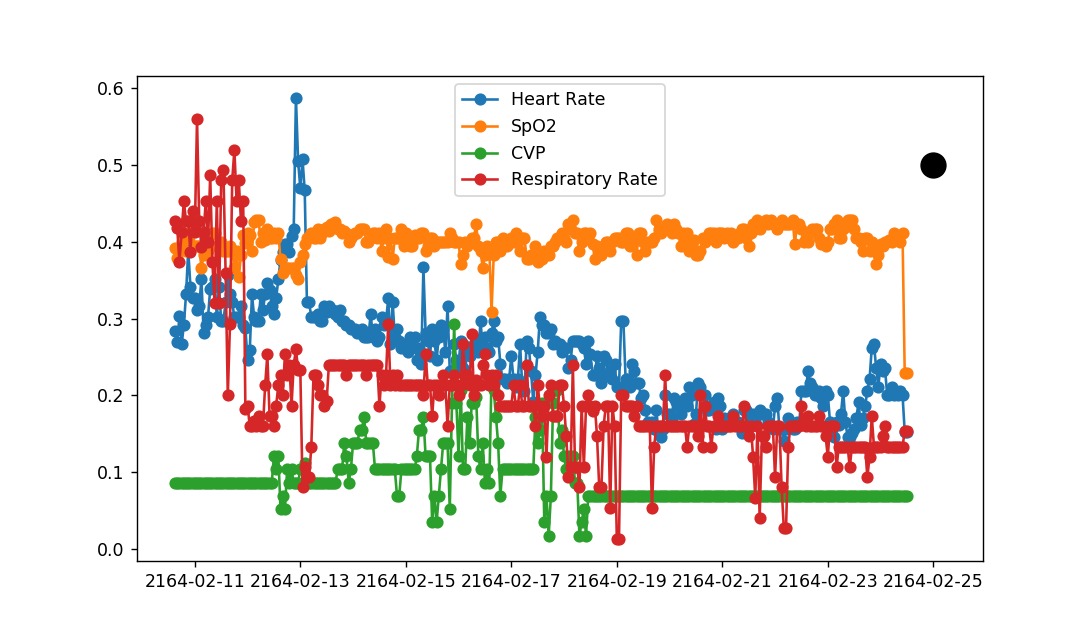

In [24]:
plottimeseries(['Heart Rate', 'SpO2', 'CVP', 'Respiratory Rate'], stays.iloc[300])

/Users/maxpoon/projects/Evidence-Based-Lab-Test-Critical-Value-Discovery-for-ICU-Patients/codes/plottimeseries.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  time_series['Time'] = pd.to_datetime(time_series['Time'])


<IPython.core.display.Javascript object>


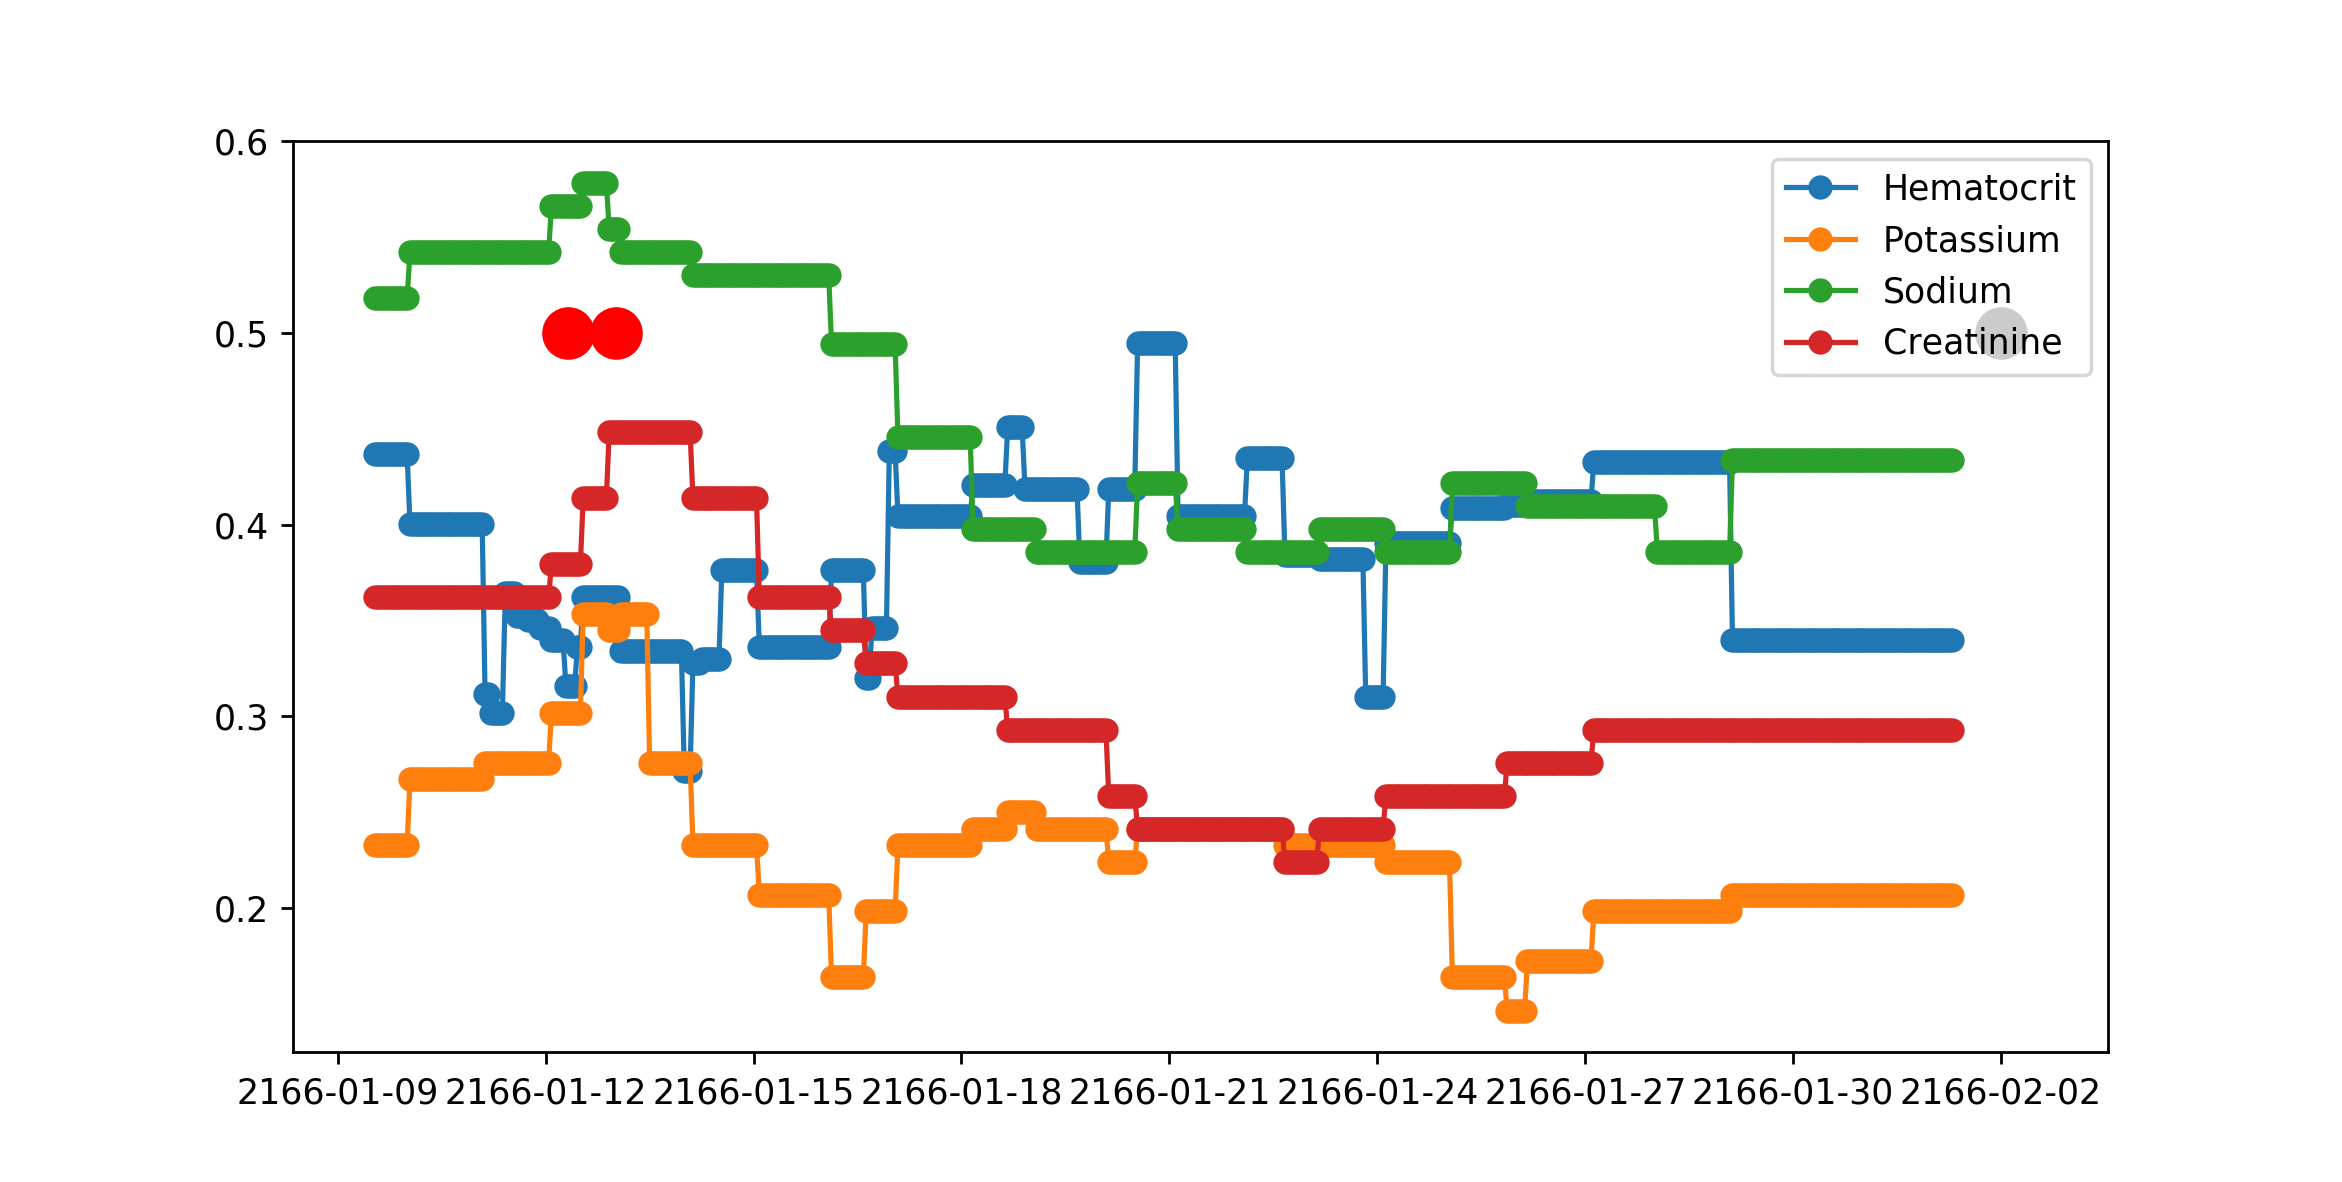

In [18]:
plottimeseries(['Hematocrit', 'Potassium', 'Sodium', 'Creatinine'], stays.iloc[37])

In [19]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from dnn import *

In [20]:
all_time_series_normalized = normalizeTimeSeries(None)
all_time_series_normalized_concat = pd.concat(all_time_series_normalized)
all_time_series_normalized_concat_0 = all_time_series_normalized_concat[all_time_series_normalized_concat['NeedInvasive Ventilation']==0]
all_time_series_normalized_concat_0 = all_time_series_normalized_concat_0.head(272394)
all_time_series_normalized_concat_1 = all_time_series_normalized_concat[all_time_series_normalized_concat['NeedInvasive Ventilation']==1]

In [21]:
all_time_series_normalized_concat = pd.concat([all_time_series_normalized_concat_0, all_time_series_normalized_concat_1])

In [22]:
features = ['age', 'gender', 'Respiratory Rate', 'SpO2', 'Temperature', 'Heart Rate', 'CVP', 'Hematocrit', 'Potassium', 'Sodium', 'Creatinine', 'Chloride', 'Urea Nitrogen', 'Platelet Count', 'White Blood Cells', 'Red Blood Cells', 'Calculated Total CO2', 'pH']
X = all_time_series_normalized_concat[features]
y = all_time_series_normalized_concat['NeedInvasive Ventilation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.array([y_train]).T
y_test = np.array([y_test]).T

In [23]:
xs = tf.placeholder(tf.float32, [None, 18])
ys = tf.placeholder(tf.float32, [None, 1])
l1 = add_layer(xs, 18, 20, activation_function=tf.nn.relu)
l2 = add_layer(l1, 20, 20, activation_function=tf.nn.relu)
prediction = add_layer(l2, 20, 1, activation_function=tf.nn.sigmoid)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
# cross_entropy = tf.reduce_mean(tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.7).minimize(loss)

In [26]:
with tf.Session() as sess:
    if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
        init = tf.initialize_all_variables()
    else:
        init = tf.global_variables_initializer()
    sess.run(init)

    for i in range(1000):
        # compute accuracy
        if i%10 == 0:
            print("Loss after {i} batches: {loss}".format(i=i, loss=sess.run(loss, feed_dict={xs: X_test, ys: y_test})))
            y_pre = sess.run(prediction, feed_dict={xs: X_test})
            y_pre = (y_pre + 0.5).astype(int)
            equality = y_pre == y_test
            print("Accuracy after {i} epochs: {accuracy}".format(i=i, accuracy=np.sum(equality)/len(equality)))
        sess.run(train_step, feed_dict={xs: X_train, ys: y_train})


Loss after 0 batches: 0.49987804889678955
Accuracy after 0 epochs: 0.4994952183410121
Loss after 10 batches: 0.49932900071144104
Accuracy after 10 epochs: 0.4994952183410121
Loss after 20 batches: 0.49532994627952576
Accuracy after 20 epochs: 0.4994952183410121
Loss after 30 batches: 0.2977070212364197
Accuracy after 30 epochs: 0.5143449769636007
Loss after 40 batches: 0.29840800166130066
Accuracy after 40 epochs: 0.5068466748655445
Loss after 50 batches: 0.26785191893577576
Accuracy after 50 epochs: 0.5124268066594467
Loss after 60 batches: 0.25864019989967346
Accuracy after 60 epochs: 0.5191541694965033
Loss after 70 batches: 0.25683021545410156
Accuracy after 70 epochs: 0.5213476752510141
Loss after 80 batches: 0.25468090176582336
Accuracy after 80 epochs: 0.5279098368178564
Loss after 90 batches: 0.2530299723148346
Accuracy after 90 epochs: 0.5345729547164962
Loss after 100 batches: 0.2509949505329132
Accuracy after 100 epochs: 0.5423924815066355
Loss after 110 batches: 0.249322056

Loss after 920 batches: 0.2325761616230011
Accuracy after 920 epochs: 0.6119330384184731
Loss after 930 batches: 0.23250611126422882
Accuracy after 930 epochs: 0.6122175517171754
Loss after 940 batches: 0.2324484884738922
Accuracy after 940 epochs: 0.612474531470842
Loss after 950 batches: 0.2324027419090271
Accuracy after 950 epochs: 0.6126030213476753
Loss after 960 batches: 0.2323676347732544
Accuracy after 960 epochs: 0.612713155527818
Loss after 970 batches: 0.23232384026050568
Accuracy after 970 epochs: 0.6132821821252226
Loss after 980 batches: 0.23226557672023773
Accuracy after 980 epochs: 0.6136217625139962
Loss after 990 batches: 0.23219725489616394
Accuracy after 990 epochs: 0.6138695644193175
